# Geometric Construction of the Polar of a Point inside an Ellipse
We can construct the polar of a point $P$ inside an ellipse $\mathcal{E}$ using the following lemma:
Given $l_1 = E x_1$ with $l_1$ being the polar of the point $x_1$ with respect to the ellipse $\mathcal{E}$. The polar $l_2$ of any point $x_2$ lying on $l_1$ are concurrent on $x_1$. 
Thus, we can construct the polar of a point $x$ inside the ellipse $\mathcal{E}$ by:
1. Drawing two lines $l_1$ and $l_2$ through $x$.
2. Finding the intersection points of $l_1$ ($p_{11}$, $p_{12}$) and $l_2$ ($p_{21}$, $p_{22}$) with the ellipse $\mathcal{E}$.
3. Drawing the lines through $p_{11}$ and $p_{12}$ and through $p_{21}$ and $p_{22}$ that are tangent with respect to the ellipse $\mathcal{E}$.
4. Calculating the intersection points $y_1$ and $y_2$ of the tangent line pairs.
5. Drawing the line through $y_1$ and $y_2$ which is the polar of the point $x$ with respect to the ellipse $\mathcal{E}$.

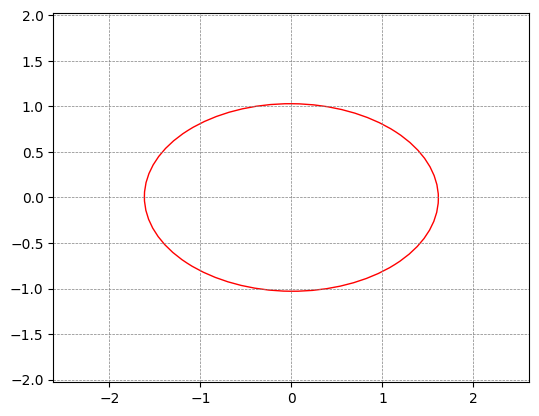

In [64]:
# Sample ellipse (centered at 0,0 for simplicity)
import numpy as np

from conics import Ellipse

rng = np.random.default_rng(6)

a, b = rng.uniform(0, 3, 2)
if a < b:
    a, b = b, a
 
center = (0, 0)
theta = rng.uniform(-0.5 * np.pi, 0.5 * np.pi)

ellipse = Ellipse(a, b, center, theta)

ellipse.visualize()

In [65]:
from typing import Any, List, Tuple
from matplotlib import patches, pyplot as plt


def visualize_construction(
    ellipses: List[Tuple[Ellipse, Any]], 
    lines: List[Tuple[np.ndarray, Any]], 
    points: List[Tuple[np.ndarray, Any]]
) -> None:
    fig, ax = plt.subplots()
    
    # Plot each ellipse
    for ellipse, kwargs in ellipses:
        e = patches.Ellipse(xy=ellipse.center, width=2*ellipse.a, height=2*ellipse.b, angle=np.degrees(ellipse.theta),
                            **kwargs)
        ax.add_patch(e)
    
    # Plot each line using axline with xy1 + slope
    for line, kwargs in lines:
        a, b, c = line
        if b != 0:
            slope = -a / b
            y_intercept = -c / b
            ax.axline((0, y_intercept), slope=slope, **kwargs)
        else:
            # Special case for vertical lines
            x_intercept = -c / a
            ax.axline((x_intercept, 0), slope=np.inf, **kwargs)
    
    # Plot each point
    for point, kwargs in points:
        ax.plot(point[0], point[1], **kwargs)
    
    # Setting the window size dynamically based on the objects
    all_x = [pt[0] for pt, _ in points] + [ellipse.center[0] for ellipse, _ in ellipses]
    all_y = [pt[1] for pt, _ in points] + [ellipse.center[1] for ellipse, _ in ellipses]
    buffer = max([ellipse.a for ellipse, _ in ellipses] + [ellipse.b for ellipse, _ in ellipses]) + 1
    ax.set_xlim(min(all_x) - buffer, max(all_x) + buffer)
    ax.set_ylim(min(all_y) - buffer, max(all_y) + buffer)
    ax.set_aspect('equal')
    plt.title('Conic Section Construction')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()


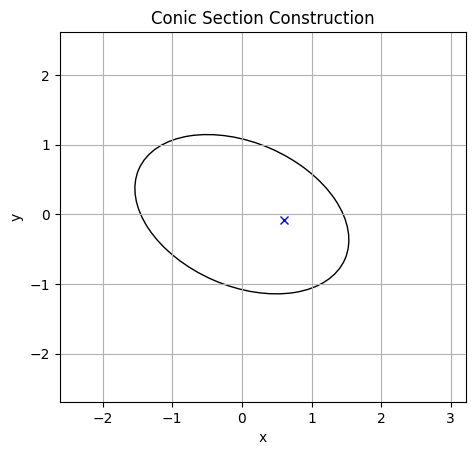

In [66]:
# Sample random point inside of the ellipse
r = rng.uniform(0, 1)
theta = rng.uniform(-np.pi, np.pi)
x, y = r * np.cos(theta), r * np.sin(theta)

# Scaling
x *= ellipse.a
y *= ellipse.b

# Rotating
x, y = x * np.cos(theta) - y * np.sin(theta), x * np.sin(theta) + y * np.cos(theta)
p0 = np.array([x, y])

# Visualize
visualize_construction(
    [(ellipse, {"ec": "black", "fc": "None"})], 
    [], 
    [(p0, {"color": "blue", "marker": "x"})]
)

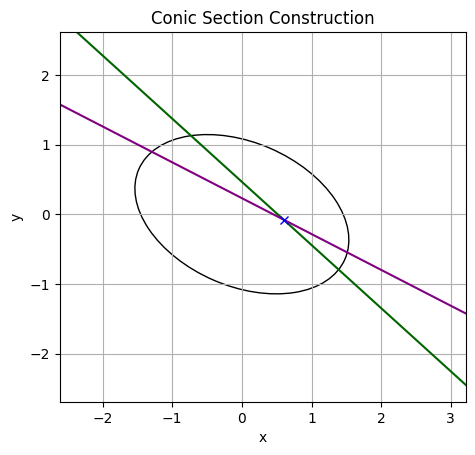

In [67]:
# Sample two lines
ds = rng.uniform(-np.pi, np.pi, 2)
a1, b1 = np.cos(ds[0]), np.sin(ds[0])
a2, b2 = np.cos(ds[1]), np.sin(ds[1])

c1 = -a1 * p0[0] - b1 * p0[1]
c2 = -a2 * p0[0] - b2 * p0[1]

l1 = np.array([a1, b1, c1])
l2 = np.array([a2, b2, c2])

# Visualize
visualize_construction(
    [(ellipse, {"ec": "black", "fc": "None"})], 
    [(l1, {"color": "darkgreen"}), (l2, {"color": "purple"})], 
    [(p0, {"color": "blue", "marker": "x"})]
)

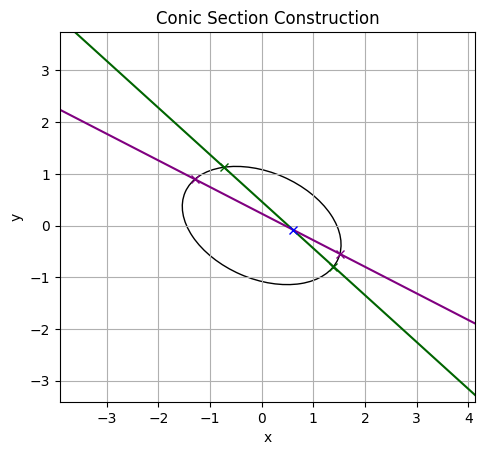

In [68]:
# Calculate intersection points between the lines and the ellipse
import sympy as sp

# Define symbols
x, y = sp.symbols('x y')

# Define the equations
A, B, C, D, E, F = ellipse.to_general_cartesian_form()

quadratic_eq = A * x**2 + B * x*y + C * y**2 + D * x + E * y + F
linear_eq_1 = l1[0] * x + l1[1] * y + l1[2]
linear_eq_2 = l2[0] * x + l2[1] * y + l2[2]

# Solve the system of equations
s11, s12 = sp.solve((linear_eq_1, quadratic_eq), (x, y))
s21, s22 = sp.solve((linear_eq_2, quadratic_eq), (x, y))

s11 = float(s11[0].evalf(subs={})), float(s11[1].evalf(subs={}))
s12 = float(s12[0].evalf(subs={})), float(s12[1].evalf(subs={}))
s21 = float(s21[0].evalf(subs={})), float(s21[1].evalf(subs={}))
s22 = float(s22[0].evalf(subs={})), float(s22[1].evalf(subs={}))

# Visualize
visualize_construction(
    [(ellipse, {"ec": "black", "fc": "None"})],
    [(l1, {"color": "darkgreen"}), (l2, {"color": "purple"})], 
    [(p0, {"color": "blue", "marker": "x"}), 
     (s11, {"color": "darkgreen", "marker": "x"}),
     (s12, {"color": "darkgreen", "marker": "x"}),
     (s21, {"color": "purple", "marker": "x"}),
     (s22, {"color": "purple", "marker": "x"})]
)

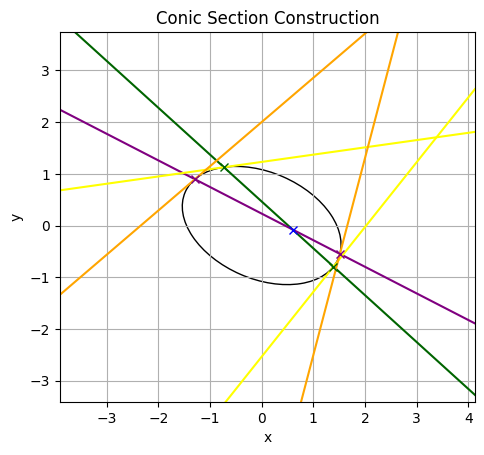

In [69]:
# Calculate the lines that are tangent to the ellipse at the intersection points s11, s12, s21, s22
mat = np.array([[A, B/2, D/2], [B/2, C, E/2], [D/2, E/2, F]])
t11 = mat @ np.array([s11[0], s11[1], 1])
t12 = mat @ np.array([s12[0], s12[1], 1])
t21 = mat @ np.array([s21[0], s21[1], 1])
t22 = mat @ np.array([s22[0], s22[1], 1])

# Visualize
visualize_construction(
    [(ellipse, {"ec": "black", "fc": "None"})],
    [(l1, {"color": "darkgreen"}), (l2, {"color": "purple"}), 
     (t11, {"color": "yellow"}), (t12, {"color": "yellow"}),
     (t21, {"color": "orange"}), (t22, {"color": "orange"})], 
    [(p0, {"color": "blue", "marker": "x"}), 
     (s11, {"color": "darkgreen", "marker": "x"}),
     (s12, {"color": "darkgreen", "marker": "x"}),
     (s21, {"color": "purple", "marker": "x"}),
     (s22, {"color": "purple", "marker": "x"})]
)

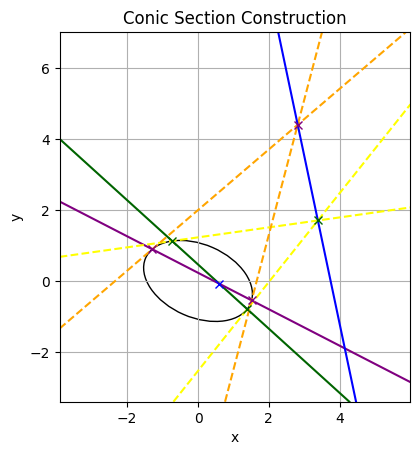

In [70]:
# Calculate the intersecting points of the tangent lines and finally the polar of p
p1 = np.cross(t11, t12)
p2 = np.cross(t21, t22)

l0 = np.cross(p1, p2)

p1 = (p1/p1[2])[:2]
p2 = (p2/p2[2])[:2]

# Visualize
visualize_construction(
    [(ellipse, {"ec": "black", "fc": "None"})],
    [(l1, {"color": "darkgreen"}), (l2, {"color": "purple"}), 
     (t11, {"color": "yellow", "linestyle": "--"}), (t12, {"color": "yellow", "linestyle": "--"}),
     (t21, {"color": "orange", "linestyle": "--"}), (t22, {"color": "orange", "linestyle": "--"}),
     (l0, {"color": "blue"})], 
    [(p0, {"color": "blue", "marker": "x"}),
     (p1, {"color": "darkgreen", "marker": "x"}),
     (p2, {"color": "purple", "marker": "x"}),
     (s11, {"color": "darkgreen", "marker": "x"}),
     (s12, {"color": "darkgreen", "marker": "x"}),
     (s21, {"color": "purple", "marker": "x"}),
     (s22, {"color": "purple", "marker": "x"})]
)